In [19]:
import redback
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
import corner
from bilby.core.prior import Constraint, PriorDict, Uniform, Sine


In [20]:
bands = ['lsstg', 'lsstr', 'lssti','lsstz','lssty', 'lsstu', 'uvot::uvw1']
frequencies=[5e9, 2e17]
bandfreqs = (redback.utils.bands_to_frequency(bands))
frequencies.extend(bandfreqs)
frequencies.sort()
frequencies

[5000000000.0,
 308738116672272.25,
 344949774531146.6,
 397287890568202.3,
 481730482385753.06,
 621093082892117.8,
 816711949886849.0,
 1146839759677006.2,
 2e+17]

In [21]:
that_priors = redback.priors.get_priors(model='tophat')
#that_priors = redback.priors.get_priors(model='tophat')
that_priors

{'redshift': Uniform(minimum=0.01, maximum=3, name='redshift', latex_label='$z$', unit=None, boundary=None),
 'thv': Sine(minimum=0, maximum=1.5707963267948966, name='thv', latex_label='$\\theta_{\\mathrm{observer}}$', unit=None, boundary=None),
 'loge0': Uniform(minimum=44, maximum=54, name='loge0', latex_label='$\\log_{10}E_{0}$', unit=None, boundary=None),
 'thc': Uniform(minimum=0.01, maximum=0.1, name='thc', latex_label='$\\theta_{\\mathrm{core}}$', unit=None, boundary=None),
 'logn0': Uniform(minimum=-5, maximum=2, name='logn0', latex_label='$\\log_{10}n_{\\mathrm{ism}}$', unit=None, boundary=None),
 'p': Uniform(minimum=2, maximum=3, name='p', latex_label='$p$', unit=None, boundary=None),
 'logepse': Uniform(minimum=-5, maximum=0, name='logepse', latex_label='$\\log_{10}\\epsilon_{e}$', unit=None, boundary=None),
 'logepsb': Uniform(minimum=-5, maximum=0, name='logepsb', latex_label='$\\log_{10}\\epsilon_{B}$', unit=None, boundary=None),
 'ksin': Uniform(minimum=0.0, maximum=1.0

In [22]:
#that_priors['loge0_const']= Constraint(minimum=49, maximum=53)
#that_priors['p_const']= Constraint(minimum=2.01, maximum=2.5)
#that_priors.update(redback.priors.get_priors(model='tophat'))
that_priors['p']=  2.3
that_priors['loge0']= Uniform(minimum=46, maximum=53, name='loge0', latex_label='$\\log_{10}E_{0}$', unit=None, boundary=None)
that_priors['redshift']= 0.01
that_priors['logepse']= -1.25
that_priors['logepsb']= -2.5
that_priors['ksin']= 1.0
that_priors['g0']= 1000
#that_priors['thv']=Sine(minimum=0, maximum=0.3, name='thv', latex_label='$\\theta_{\\mathrm{observer}}$', unit=None, boundary=None)
that_priors

{'redshift': 0.01,
 'thv': Sine(minimum=0, maximum=1.5707963267948966, name='thv', latex_label='$\\theta_{\\mathrm{observer}}$', unit=None, boundary=None),
 'loge0': Uniform(minimum=46, maximum=53, name='loge0', latex_label='$\\log_{10}E_{0}$', unit=None, boundary=None),
 'thc': Uniform(minimum=0.01, maximum=0.1, name='thc', latex_label='$\\theta_{\\mathrm{core}}$', unit=None, boundary=None),
 'logn0': Uniform(minimum=-5, maximum=2, name='logn0', latex_label='$\\log_{10}n_{\\mathrm{ism}}$', unit=None, boundary=None),
 'p': 2.3,
 'logepse': -1.25,
 'logepsb': -2.5,
 'ksin': 1.0,
 'g0': 1000}

In [42]:
sample=that_priors.sample(10000)
tophat_data=pd.DataFrame.from_dict(sample)
tophat_data= tophat_data[tophat_data['thc'] < tophat_data['thv']]
#onaxis = tophat_data[tophat_data['thv'] < 0.06]
#offaxis= tophat_data[tophat_data['thv'] > 0.06]
tophat_data

,redshift,thv,loge0,thc,logn0,p,logepse,logepsb,ksin,g0
0,0.01,0.574954,50.012293,0.079636,-2.207286,2.3,-1.25,-2.5,1.0,1000.0
1,0.01,0.714370,48.410155,0.019364,-2.984654,2.3,-1.25,-2.5,1.0,1000.0
2,0.01,0.762560,46.001388,0.037892,-2.432941,2.3,-1.25,-2.5,1.0,1000.0
3,0.01,1.466098,49.257943,0.015613,-1.328339,2.3,-1.25,-2.5,1.0,1000.0
4,0.01,0.917325,47.937271,0.021450,-4.532610,2.3,-1.25,-2.5,1.0,1000.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.01,1.476058,50.635913,0.099462,-4.271889,2.3,-1.25,-2.5,1.0,1000.0
9996,0.01,1.471884,46.565316,0.089516,-4.326734,2.3,-1.25,-2.5,1.0,1000.0
9997,0.01,0.355181,50.117678,0.077749,-3.031359,2.3,-1.25,-2.5,1.0,1000.0
9998,0.01,1.526823,46.090390,0.023458,-2.723432,2.3,-1.25,-2.5,1.0,1000.0


In [24]:
def tophat_peak(time, frequency, redshift, thv, loge0,thc,logn0,p,logepse,logepsb,ksin,g0):
   
    flux= redback.transient_models.extinction_models.extinction_with_afterglow_base_model(time=time, redshift=redshift, av=0.5,
        base_model='tophat',  thv= thv, loge0=loge0 , thc=thc, logn0=logn0, p=p, logepse=logepse, logepsb=logepsb, ksin=ksin, g0=g0,
        output_format='flux_density', frequency=frequency)
    
    return time[np.argmax(flux)], flux

In [43]:
time= np.linspace(0.01, 300,200)
indexoff=[] #indexes to keep for off axis
indexon=[] #indexes for on axis

for i in range(len(tophat_data)):
    
    parameters=np.array(tophat_data.iloc[i])
    peaktime, peakflux = tophat_peak(time, frequencies[7], *parameters)
    if max(peakflux)> 10e-12:
        if peaktime < 200 and peaktime >0.01:
            indexoff.append(i)
        elif peaktime == 0.01:
            indexon.append(i)
        
off_axis = tophat_data.iloc[indexoff]
on_axis = tophat_data.iloc[indexon]

peaktime may be more relevant for two layer rather than metzger/stratified so cannot refine data by peak too much- gives higher chance of seeing at lower peak times but not always necessary- min flux detectable?

In [44]:
off_axis             

,redshift,thv,loge0,thc,logn0,p,logepse,logepsb,ksin,g0
0,0.01,0.258910,51.332448,0.050328,-4.878111,2.3,-1.25,-2.5,1.0,1000.0
3,0.01,0.263059,51.610792,0.017807,-2.515328,2.3,-1.25,-2.5,1.0,1000.0
6,0.01,0.290360,51.549303,0.084962,-4.315269,2.3,-1.25,-2.5,1.0,1000.0
10,0.01,0.263318,48.406981,0.076928,-0.961843,2.3,-1.25,-2.5,1.0,1000.0
11,0.01,0.232505,50.363534,0.065258,0.083106,2.3,-1.25,-2.5,1.0,1000.0
...,...,...,...,...,...,...,...,...,...,...
9993,0.01,0.225026,52.020114,0.067156,0.252571,2.3,-1.25,-2.5,1.0,1000.0
9994,0.01,0.163709,50.183883,0.097577,-2.620262,2.3,-1.25,-2.5,1.0,1000.0
9995,0.01,0.160055,48.922202,0.038153,-0.108229,2.3,-1.25,-2.5,1.0,1000.0
9997,0.01,0.209502,48.728010,0.079531,-3.019317,2.3,-1.25,-2.5,1.0,1000.0


In [26]:
on_axis

,redshift,thv,loge0,thc,logn0,p,logepse,logepsb,ksin,g0
46,0.01,0.089198,46.107882,0.076245,1.152187,2.3,-1.25,-2.5,1.0,1000.0
64,0.01,0.182706,46.069596,0.088822,0.267702,2.3,-1.25,-2.5,1.0,1000.0
97,0.01,0.215524,47.428329,0.086182,1.444946,2.3,-1.25,-2.5,1.0,1000.0
149,0.01,0.100123,48.622159,0.099546,-0.383258,2.3,-1.25,-2.5,1.0,1000.0
254,0.01,0.064712,48.438706,0.038912,-3.683531,2.3,-1.25,-2.5,1.0,1000.0
...,...,...,...,...,...,...,...,...,...,...
9248,0.01,0.336331,46.990778,0.061723,1.615567,2.3,-1.25,-2.5,1.0,1000.0
9340,0.01,0.065915,49.811231,0.064037,-1.337817,2.3,-1.25,-2.5,1.0,1000.0
9413,0.01,0.412785,46.294904,0.032532,1.769741,2.3,-1.25,-2.5,1.0,1000.0
9585,0.01,0.065937,49.171579,0.025586,-1.315726,2.3,-1.25,-2.5,1.0,1000.0


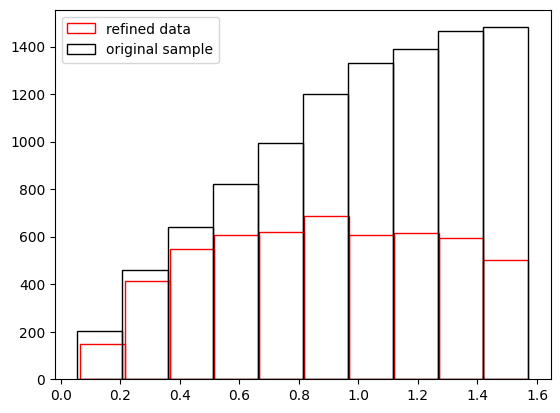

In [27]:
ax=plt.subplot()
ax.hist(off_axis['thv'], fill=None, edgecolor='r', label='refined data')
ax.hist(tophat_data['thv'], fill=None, label='original sample' )
ax.legend()
plt.show()

thv peak shifts higher for higher peak cutoff

In [46]:
ax1=plt.subplot
ax1.hist(off_axis['loge0'], fill=None, edgecolor='r', label='refined data')
ax.hist(tophat_data['loge0'], fill=None, label='original sample' )
plt.legend()
plt.show()

AttributeError: 'function' object has no attribute 'hist'

consistent trend suggests lower e0 more likely across diff cutoff times, setting minimum flux cuts off/decreases lower values

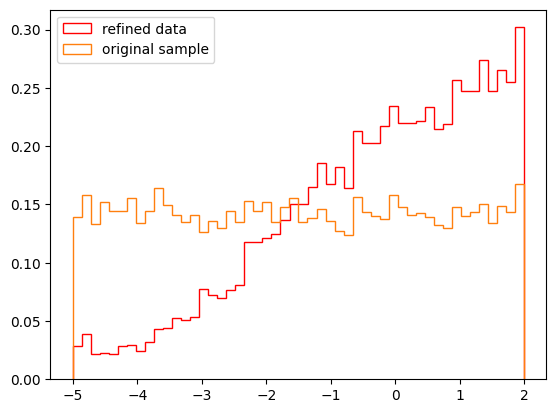

In [52]:
ax2=plt.subplot()
ax2.hist(off_axis['logn0'], fill=None, edgecolor='r', label='refined data', bins=50, histtype='step', density=True)
ax2.hist(tophat_data['logn0'], fill=None, label='original sample', histtype='step',bins=50, density=True )
plt.legend()
plt.show()

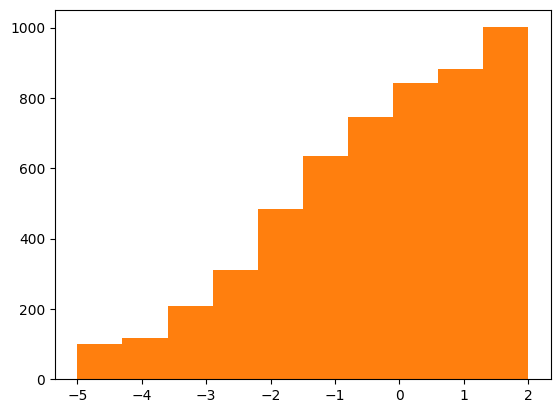

In [48]:
plt.hist(off_axis['logn0'])
plt.show()

consistent trend suggests higher logn0 more likely across diff cutoff times

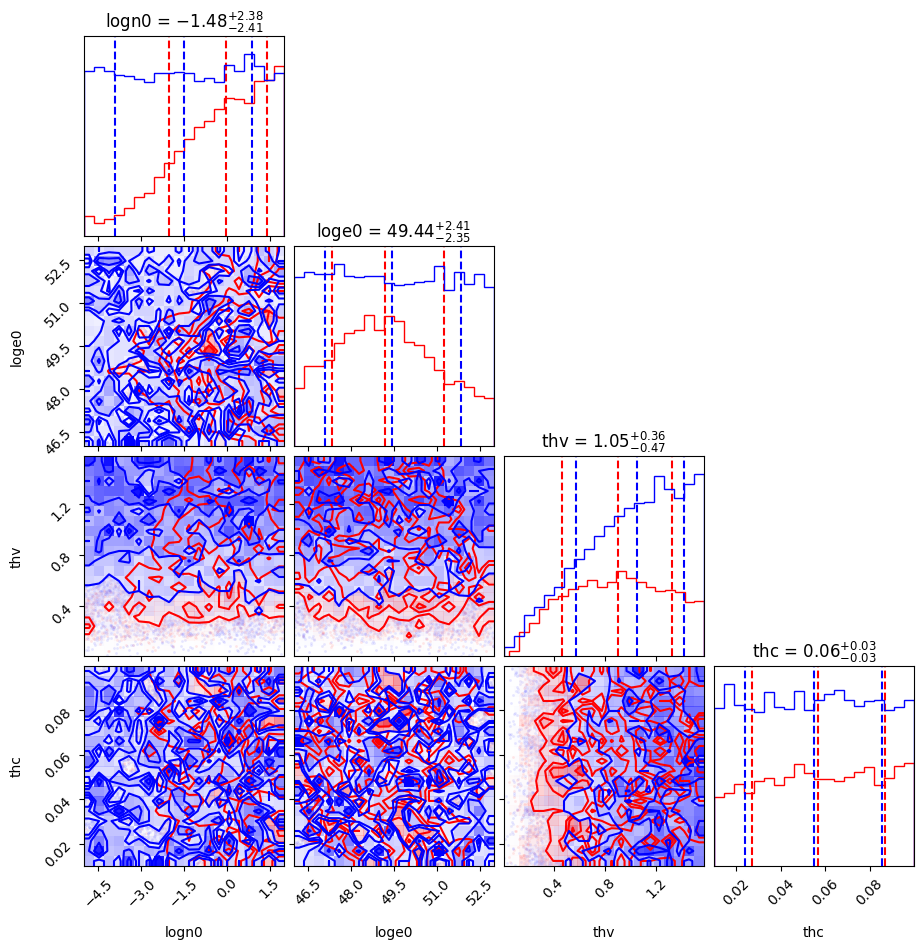

In [58]:
data= np.array([off_axis['logn0'],off_axis['loge0'],off_axis['thv'],off_axis['thc']])
data=data.transpose()

newdata=that_priors.sample(10000)
newdata=pd.DataFrame.from_dict(newdata)
newdata=np.array([newdata['logn0'],newdata['loge0'],newdata['thv'],newdata['thc']])
newdata=newdata.transpose()
figure=corner.corner(data, labels=["logn0", "loge0", 'thv','thc'], quantiles=[0.16, 0.5, 0.84], show_titles=True, color='red')
figure=corner.corner(newdata, labels=["logn0", "loge0", 'thv','thc'], quantiles=[0.16, 0.5, 0.84], show_titles=True, color='blue', fig=figure)
figure

In [14]:
0.31, 49.74,0.87,0.06

(0.31, 49.74, 0.87, 0.06)

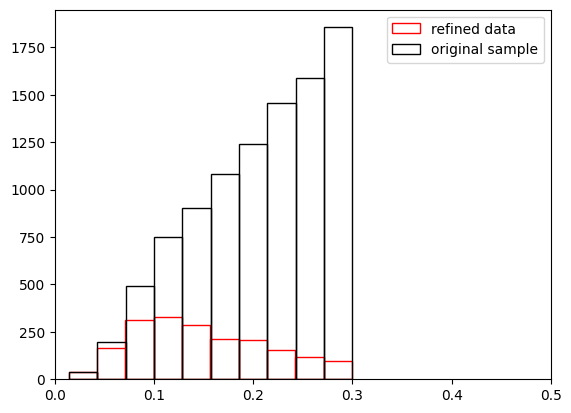

In [11]:
plt.hist(on_axis['thv'], fill=None, edgecolor='r', label='refined data')
plt.hist(tophat_data['thv'], fill=None, label='original sample' )
plt.xlim(0,0.5)
#plt.ylim(0,200)
plt.legend()

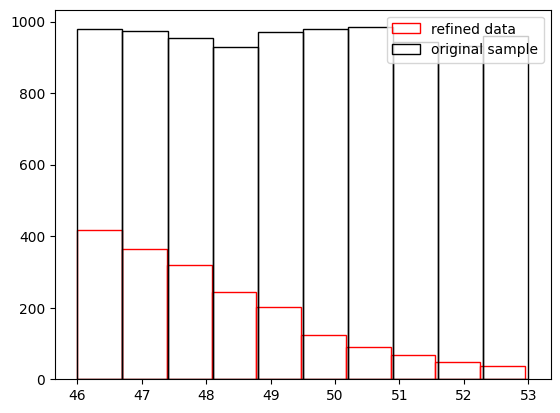

In [12]:
plt.hist(on_axis['loge0'], fill=None, edgecolor='r', label='refined data')
plt.hist(tophat_data['loge0'], fill=None, label='original sample' )
#plt.ylim(0,100)
plt.legend()

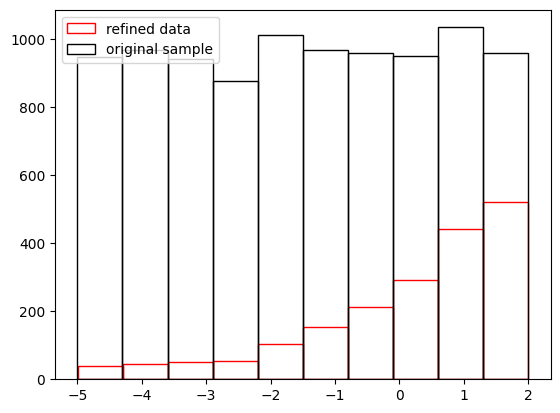

In [13]:
plt.hist(on_axis['logn0'], fill=None, edgecolor='r', label='refined data')
plt.hist(tophat_data['logn0'], fill=None, label='original sample' )
#plt.ylim(0,100)
plt.legend()

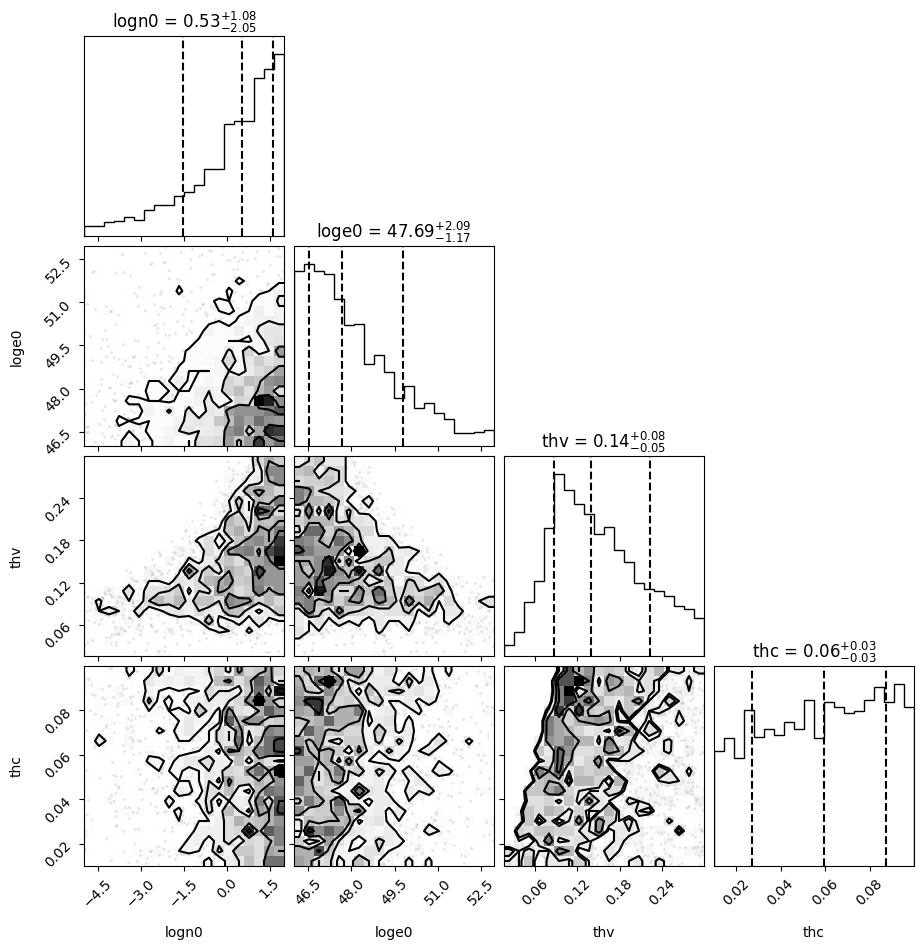

In [46]:
data= np.array([on_axis['logn0'],on_axis['loge0'],on_axis['thv'],on_axis['thc']])
data=data.transpose()

figure=corner.corner(data, labels=["logn0", "loge0", 'thv','thc'], quantiles=[0.16, 0.5, 0.84], show_titles=True)
figure

In [ ]:
0.53,47.69,0.14,0.06

In [9]:
strat_priors = redback.priors.get_priors(model='two_layer_stratified_kilonova')
#that_priors = redback.priors.get_priors(model='tophat')
strat_priors['redshift']=0.01
strat_priors

{'redshift': 0.01,
 'mej': Uniform(minimum=0.01, maximum=0.05, name='mej', latex_label='$M_{\\mathrm{ej}}[M_{\\odot}]$', unit=None, boundary=None),
 'vej_1': Uniform(minimum=0.05, maximum=0.2, name='vej_1', latex_label='$v_{\\mathrm{ej}-1}[c]$', unit=None, boundary=None),
 'vej_2': Uniform(minimum=0.3, maximum=0.5, name='vej_2', latex_label='$v_{\\mathrm{ej}-2}[c]$', unit=None, boundary=None),
 'kappa': Uniform(minimum=1, maximum=30, name='kappa', latex_label='$\\kappa$', unit=None, boundary=None),
 'beta': Uniform(minimum=1.5, maximum=8, name='beta', latex_label='$\\beta$', unit=None, boundary=None)}

In [10]:
sample=strat_priors.sample(10000)
stratified_data=pd.DataFrame.from_dict(sample)
#stratified_data= stratified_data[stratified_data['vej1'] < stratified_data['vej2']]

In [11]:
def stratified_peak(time, frequency, redshift, mej, vej_1,vej_2,kappa,beta):
   
    flux= redback.transient_models.extinction_models.extinction_with_kilonova_base_model(time=time, redshift=redshift, av=0.5,
        base_model='two_layer_stratified_kilonova', mej=mej, vej_1=vej_1, vej_2=vej_2, kappa=kappa, beta=beta,
        output_format='flux_density', frequency=frequency)
    
    return time[np.argmax(flux)], flux

In [12]:
time= np.linspace(0.03,30,50)
index=[]

for i in range(len(stratified_data)):
    
    parameters=np.array(stratified_data.iloc[i])
    peaktime, peakflux = stratified_peak(time, frequencies[7], *parameters)
    if max(peakflux)> 10e-10:
        if peaktime < 20:
            index.append(i)
            
stratified_data= stratified_data.iloc[index] 
stratified_data

,redshift,mej,vej_1,vej_2,kappa,beta
0,0.01,0.014538,0.106013,0.485057,24.401387,7.532413
1,0.01,0.015544,0.066612,0.339011,24.452447,2.612570
2,0.01,0.043932,0.143253,0.333960,14.759564,6.701042
3,0.01,0.023482,0.144102,0.450282,15.946773,2.229125
4,0.01,0.020135,0.108739,0.417402,4.782055,7.897904
...,...,...,...,...,...,...
9995,0.01,0.024183,0.084781,0.361508,21.628842,7.083160
9996,0.01,0.023814,0.196014,0.478973,22.778632,6.272362
9997,0.01,0.046232,0.056128,0.416848,25.612894,3.987298
9998,0.01,0.025939,0.121259,0.306300,23.731060,3.203690


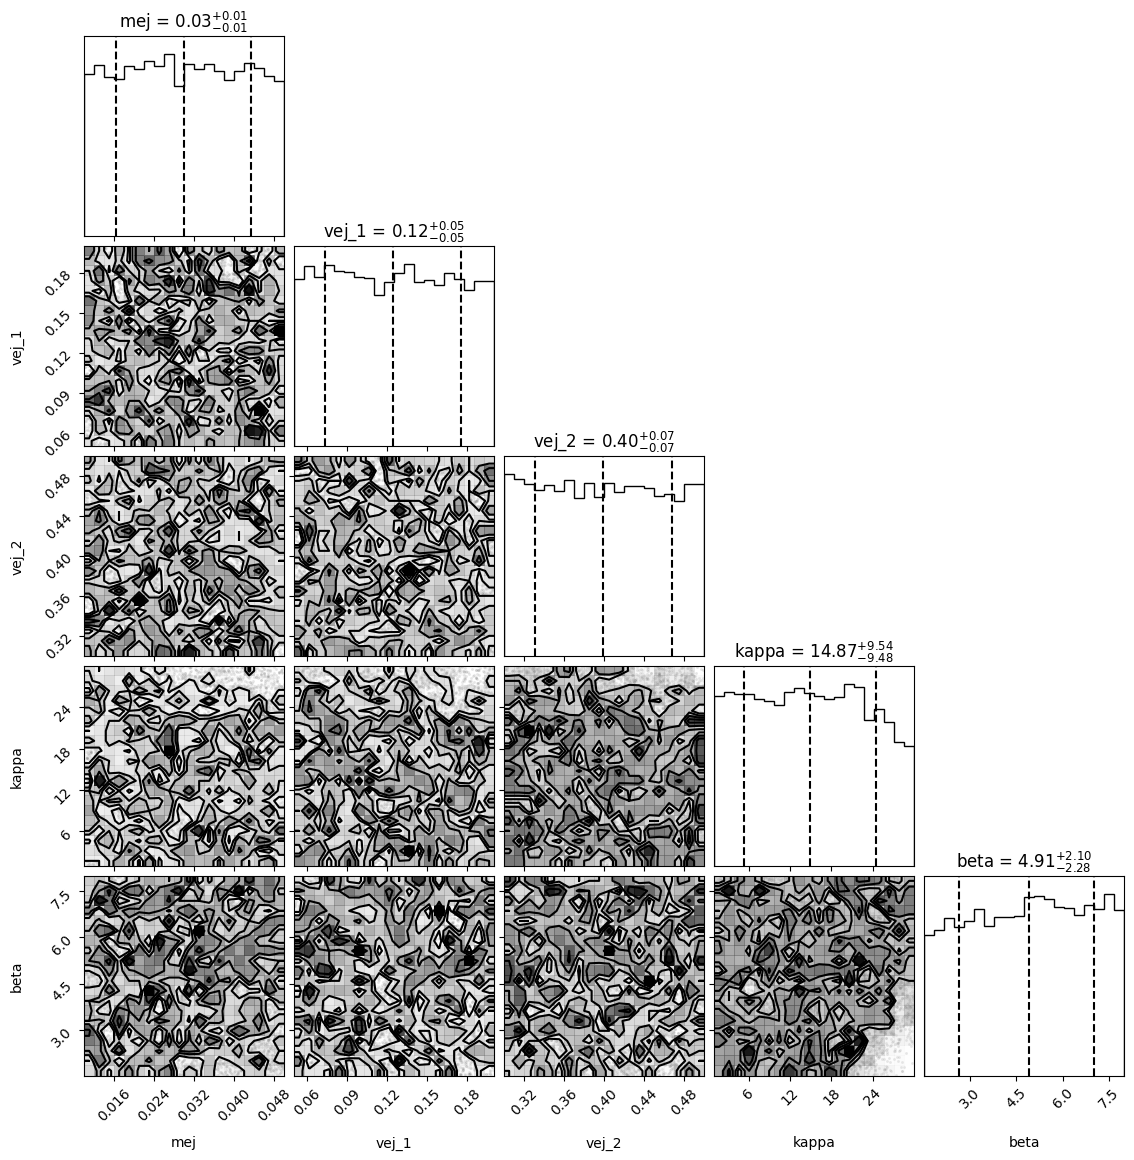

In [20]:
data= np.array([stratified_data['mej'],stratified_data['vej_1'],stratified_data['vej_2'],stratified_data['kappa'], stratified_data['beta']])
data=data.transpose()

figure=corner.corner(data, labels=["mej", "vej_1", 'vej_2','kappa','beta'], quantiles=[0.16, 0.5, 0.84], show_titles=True)

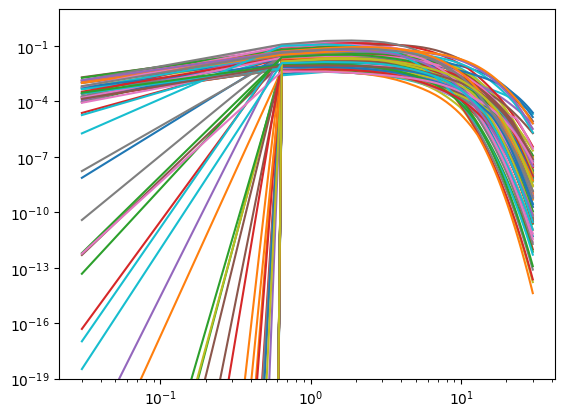

In [18]:
time= np.linspace(0.03,30,50)
for i in range(100):
        flux= redback.transient_models.extinction_models.extinction_with_kilonova_base_model(time=time, av=0.5,
          base_model='two_layer_stratified_kilonova', 
          output_format='flux_density', frequency=frequencies[1],**stratified_data.iloc[i])
        plt.loglog(time,flux)
        plt.ylim(10e-20,10)

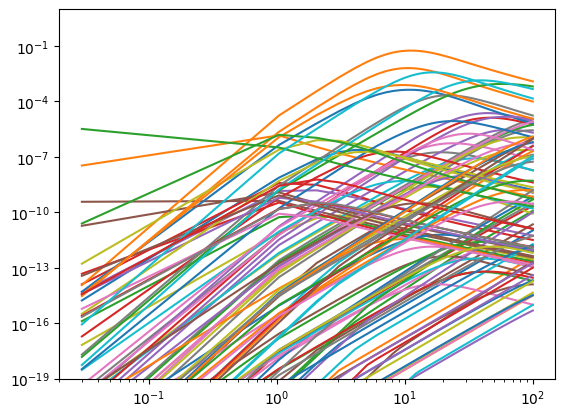

In [14]:
time= np.linspace(0.03,100,100)
for i in range(100):
        flux= redback.transient_models.extinction_models.extinction_with_afterglow_base_model(time=time, av=0.5,
          base_model='tophat', 
          output_format='flux_density', frequency=frequencies[4],**tophat_data.iloc[i])
        plt.loglog(time,flux)
        plt.ylim(10e-20,10)